The discrete Fourier transform (DFT) is one of the most powerful tools in digital signal processing.


In [1]:
fft_slow <- function(inputSignal,samplingFrequency = 512, display=1, title = 'Frequency domain'){
  #define num samples as the dimention of signalIndex.
  N = length(inputSignal)
  
  #perform the FFT. In this case the number of points (N) will be equal to 1000. Output will be the individual components of the FFT.
  fourierComponents = fft(inputSignal)
  
  #get the absolute value of the coefficients  
  fourierCoefficients = abs(fourierComponents)
  
  #Normalize coefficients  here N = 1000 samples so N/2 = 500
  normalizedFourierComponents = fourierCoefficients / (N/2)
  
  bin_freq = (c(1:length(normalizedFourierComponents)) * samplingFrequency)/N #  (c(1:N/2) * samplingFrequency)/N   
  #get the first 50 coefficients fig 6
  range = 1:(display* length(inputSignal)/2)
  mainCoeffs = normalizedFourierComponents[range]
  plot(bin_freq[range],mainCoeffs,type='h', xlab='hz', ylab='Amp', main = title)
  paste('max frequency is', round(bin_freq[which(mainCoeffs==max(mainCoeffs))],2))
  
}

[1] "max frequency is 0.6"

[1] "max frequency is 0.6"

[1] "max frequency is 0.6"

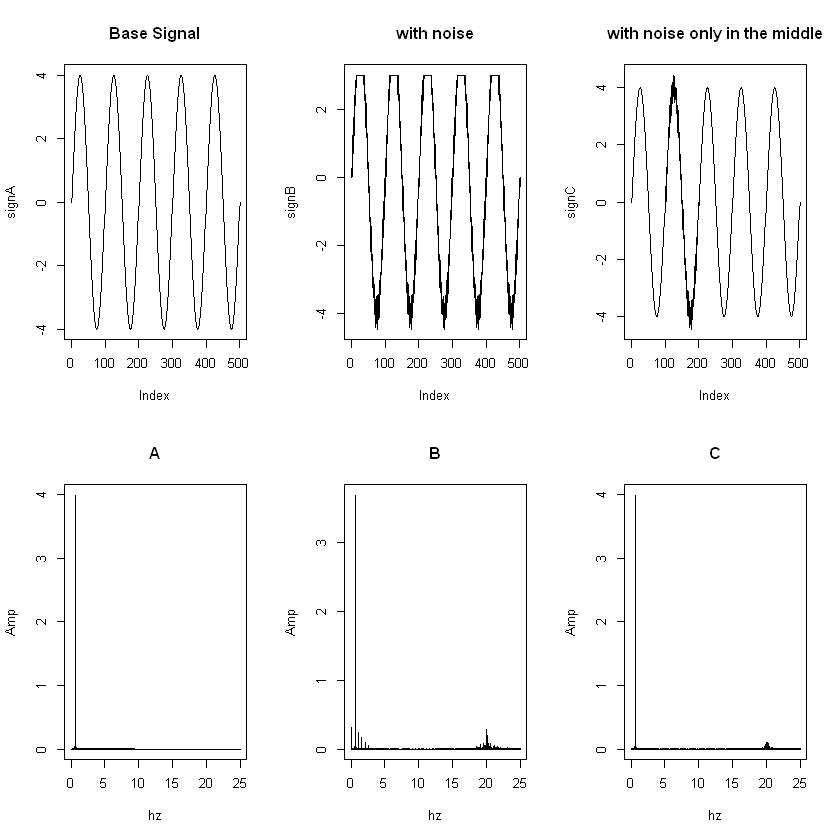

In [2]:
# set plot display
par(mfrow=c(2,3))

# set the sampling frequency
samplingFrequency = 50
timeInterval = 1/samplingFrequency
timeIndex = seq(0,10,timeInterval)
a1 = 4
# Frequency of signal
freq1 = 0.5
signA = a1 * sin(2*pi*freq1*timeIndex)
plot(signA, type = 'l', main = 'Base Signal')

a2 = 0.5
freq2 = 20
noise = a2 * sin(2 * pi*freq2 * timeIndex)

# Fourier Series only holds while the system is linear. The superposition principle,[1] also known as superposition property, states that, for all linear systems, the net response caused by two or more stimuli is the sum of the responses that would have been caused by each stimulus individually. So that if input A produces response X and input B produces response Y then input (A + B) produces response (X + Y). Therefore, if a thresholdhing exist, FFT does not fit for this scenario
signB = signA +noise
signB[signB>3] =3
plot(signB, type = 'l', main = 'with noise')
noise[1:100] = 0
noise[200:501] =0
signC = signA +noise
plot(signC, type = 'l', main = 'with noise only in the middle')

fft_slow(signA, samplingFrequency = 50, title = 'A')
fft_slow(signB, samplingFrequency = 50,title ='B')
fft_slow(signC, samplingFrequency = 50,title ='C')
# If I only have a part of the signal contains error, then fft also won't work